In [1]:
import numpy as np
import matplotlib.pyplot as plt

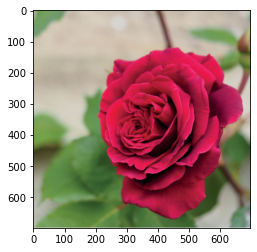

In [24]:
img = plt.imread('image.jpg')
plt.imshow(img)

In [81]:
def apply_mask(img, mask):
    width = img.shape[0]
    height = img.shape[1]
    mask_size = mask.shape[0]
    across = int((mask_size-1)/2)
    
    if img.shape[2] == 3:
        output_img = np.zeros((width,height,3), dtype=np.uint8)
        mask = mask.reshape(pow(mask_size,2),1)
        mask_for_RBG = np.concatenate((mask,mask,mask),axis = 1).reshape(mask_size,mask_size,3)
    
    else:
        mask_for_RBG = mask
        output_img = np.zeros((width,height), dtype=np.uint8)
        
    for i in range(width):
        for j in range(height):
            if i > across-1 and j > across-1 and i < width-across and j < height-across:
                mask_region = img[i-across:i+across+1,j-across:j+across+1]
                output_pixel = abs(np.sum(np.sum(mask_region*mask_for_RBG,axis = 0),axis = 0))
                output_pixel[output_pixel>255] = 255
                output_img[i][j] = output_pixel
            else:
                output_img[i][j] = img[i][j]
            
            '''
            if i == 20 and j == 20:
                print(mask_region)
                print()
                print(mask_region*mask_for_RBG)
                print()
                print(np.sum(np.sum(mask_region*mask_for_RBG,axis = 0),axis = 0)* k1)
                print()
                print(output_img[i][j])
            '''
            
    return output_img

In [27]:
def grayscale(img):
    width = img.shape[0]
    height = img.shape[1]
    output_img = np.zeros((width,height,3), dtype=np.uint8)
    for i in range(width):
        for j in range(height):
            output_img[i][j] = np.mean(img[i][j])
    return output_img

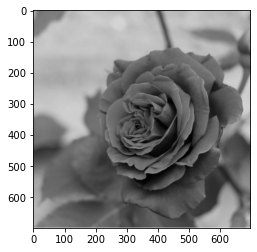

In [103]:
gc_img = grayscale(img)
plt.imshow(gc_img)
plt.imsave('image_grayscale.jpg', gc_img)

# Low pass filter

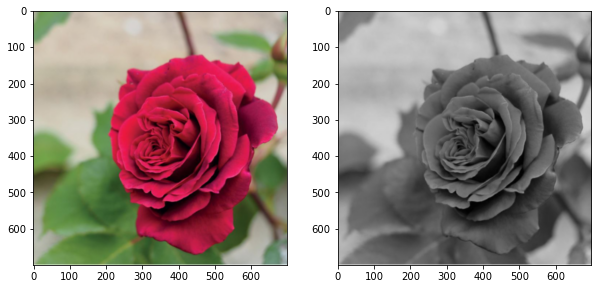

In [73]:
low_pass_mask = np.array([[1,1,1],[1,1,1],[1,1,1]])
low_pass_k1 = 1/9
low_pass_mask = low_pass_mask*low_pass_k1

low_pass_img = apply_mask(img, low_pass_mask)
low_pass_gc_img = apply_mask(gc_img, low_pass_mask)

fig,axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(low_pass_img)
axs[1].imshow(low_pass_gc_img)

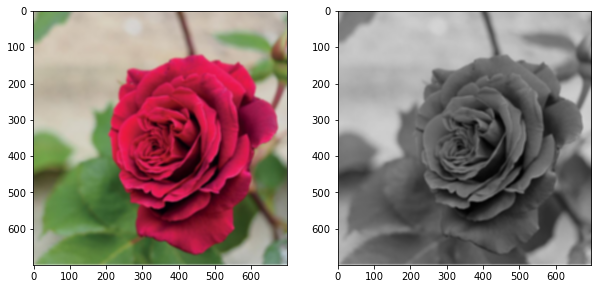

In [72]:
low_pass_mask = np.array([[1,1,1,1,1,1,1],\
                          [1,1,1,1,1,1,1],\
                          [1,1,1,1,1,1,1],\
                          [1,1,1,1,1,1,1],\
                          [1,1,1,1,1,1,1],\
                          [1,1,1,1,1,1,1],\
                          [1,1,1,1,1,1,1]])
low_pass_k1 = 1/49
low_pass_mask = low_pass_mask*low_pass_k1

low_pass_img_2 = apply_mask(img, low_pass_mask)
low_pass_gc_img_2 = apply_mask(gc_img, low_pass_mask)

fig,axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(low_pass_img_2)
axs[1].imshow(low_pass_gc_img_2)

# High pass filter

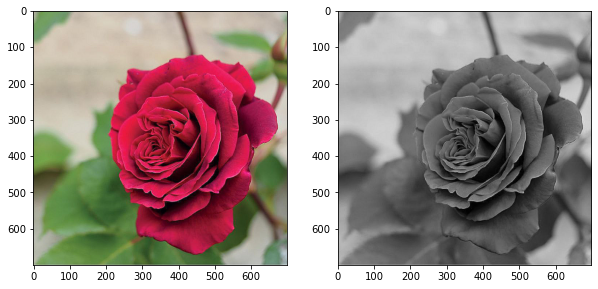

In [74]:
high_pass_mask = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
high_pass_k1 = 1
high_pass_mask = high_pass_mask*high_pass_k1

high_pass_img = apply_mask(img, high_pass_mask)
high_pass_gc_img = apply_mask(gc_img,high_pass_mask)

fig,axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(high_pass_img)
axs[1].imshow(high_pass_gc_img)

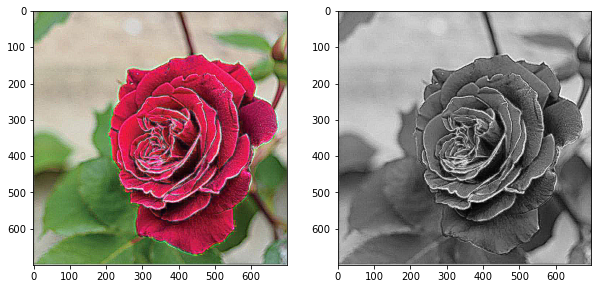

In [75]:
high_pass_mask = np.array([[0, -1,-1,-1, 0],\
                           [-1, 3,-4, 3,-1],\
                           [-1,-4,17,-4,-1],\
                           [-1, 3,-4, 3,-1],\
                           [0, -1,-1,-1, 0]])
high_pass_k1 = 1
high_pass_mask = high_pass_mask*high_pass_k1

high_pass_img_2 = apply_mask(img, high_pass_mask)
high_pass_gc_img_2 = apply_mask(gc_img, high_pass_mask)

fig,axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(high_pass_img_2)
axs[1].imshow(high_pass_gc_img_2)

# Perwitt

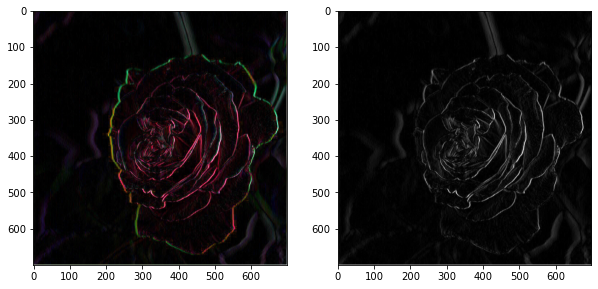

In [82]:
prewitt_vertical_mask = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
prewitt_vertical_k1 = 1
prewitt_vertical_mask = prewitt_vertical_mask*prewitt_vertical_k1

prewitt_vertical_img = apply_mask(img, prewitt_vertical_mask)
prewitt_vertical_gc_img = apply_mask(gc_img, prewitt_vertical_mask)

fig,axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(prewitt_vertical_img)
axs[1].imshow(prewitt_vertical_gc_img)

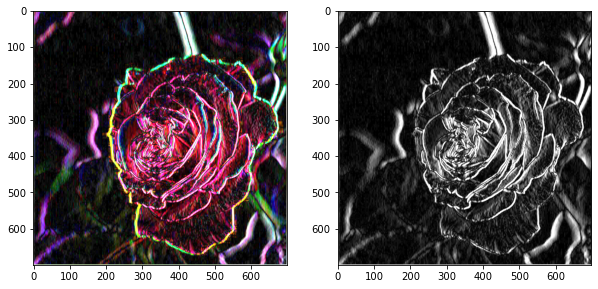

In [80]:
prewitt_vertical_mask = np.array([[1,2,0,-2,-1],\
                                  [1,2,0,-2,-1],\
                                  [1,2,0,-2,-1],\
                                  [1,2,0,-2,-1],\
                                  [1,2,0,-2,-1]])
prewitt_vertical_k1 = 1
prewitt_vertical_mask = prewitt_vertical_mask*prewitt_vertical_k1

prewitt_vertical_img_2 = apply_mask(img, prewitt_vertical_mask)
prewitt_vertical_gc_img_2 = apply_mask(gc_img, prewitt_vertical_mask)

fig,axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(prewitt_vertical_img_2)
axs[1].imshow(prewitt_vertical_gc_img_2)

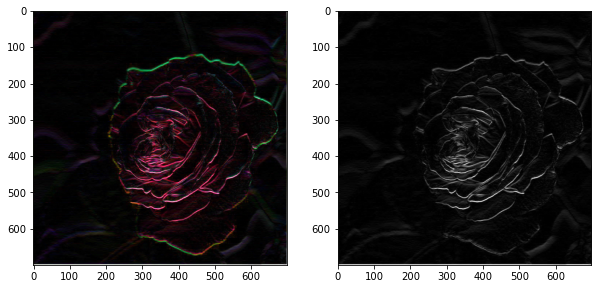

In [83]:
prewitt_horizontal_mask = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
prewitt_horizontal_k1 = 1
prewitt_horizontal_mask = prewitt_horizontal_mask*prewitt_horizontal_k1

prewitt_horizontal_img = apply_mask(img, prewitt_horizontal_mask)
prewitt_horizontal_gc_img = apply_mask(gc_img, prewitt_horizontal_mask)

fig,axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(prewitt_horizontal_img)
axs[1].imshow(prewitt_horizontal_gc_img)

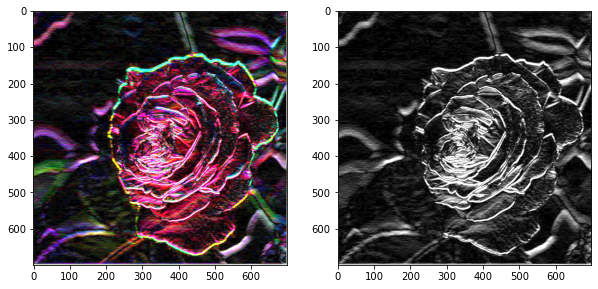

In [84]:
prewitt_horizontal_mask = np.array([[ 1, 1, 1, 1, 1],\
                                    [ 2, 2, 2, 2, 2],
                                    [ 0, 0, 0, 0, 0],\
                                    [-2,-2,-2,-2,-2],\
                                    [-1,-1,-1,-1,-1]])
prewitt_horizontal_k1 = 1
prewitt_horizontal_mask = prewitt_horizontal_mask*prewitt_horizontal_k1

prewitt_horizontal_img_2 = apply_mask(img, prewitt_horizontal_mask)
prewitt_horizontal_gc_img_2 = apply_mask(gc_img, prewitt_horizontal_mask)

fig,axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(prewitt_horizontal_img_2)
axs[1].imshow(prewitt_horizontal_gc_img_2)

# Sobel

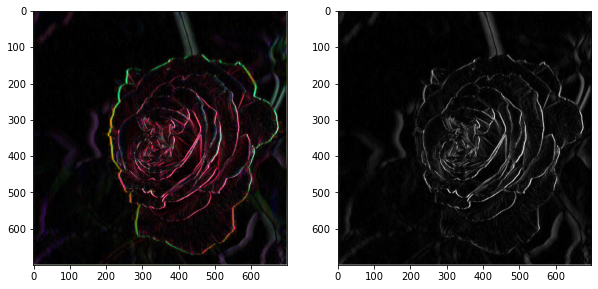

In [87]:
sobel_vertical_mask = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sobel_vertical_k1 = 1
sobel_vertical_mask = sobel_vertical_mask*sobel_vertical_k1

sobel_vertical_img = apply_mask(img, sobel_vertical_mask)
sobel_vertical_gc_img = apply_mask(gc_img, sobel_vertical_mask)

fig,axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(sobel_vertical_img)
axs[1].imshow(sobel_vertical_gc_img)

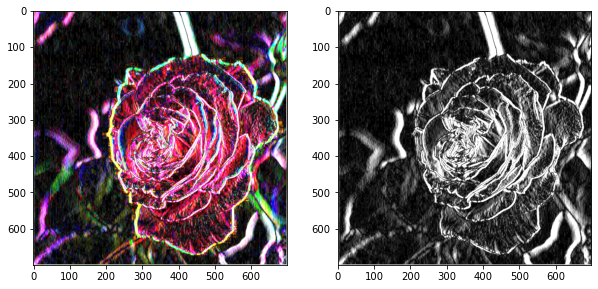

In [88]:
sobel_vertical_mask = np.array([[1, 2,0,-2,-1],\
                                [2, 3,0,-3,-2],\
                                [3, 4,0,-4,-3],\
                                [2, 3,0,-3,-2],\
                                [1, 2,0,-2,-1]])
sobel_vertical_k1 = 1
sobel_vertical_mask = sobel_vertical_mask*sobel_vertical_k1

sobel_vertical_img_2 = apply_mask(img, sobel_vertical_mask)
sobel_vertical_gc_img_2 = apply_mask(gc_img, sobel_vertical_mask)

fig,axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(sobel_vertical_img_2)
axs[1].imshow(sobel_vertical_gc_img_2)

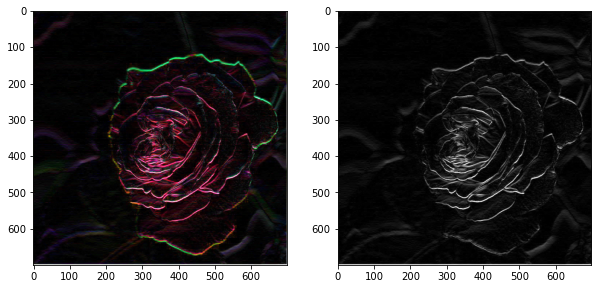

In [89]:
sobel_horizontal_mask = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
sobel_horizontal_k1 = 1
sobel_horizontal_mask = sobel_horizontal_mask*sobel_horizontal_k1

sobel_horizontal_img = apply_mask(img, sobel_horizontal_mask)
sobel_horizontal_gc_img = apply_mask(gc_img, sobel_horizontal_mask)

fig,axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(sobel_horizontal_img)
axs[1].imshow(sobel_horizontal_gc_img)

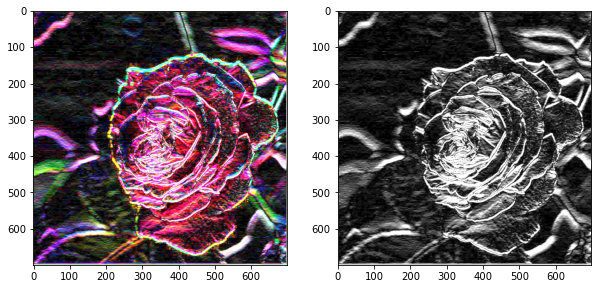

In [90]:
sobel_horizontal_mask = np.array([[ 1, 2, 3, 2, 1],\
                                  [ 2, 3, 4, 3, 2],\
                                  [ 0, 0, 0, 0, 0],\
                                  [-2,-3,-4,-3,-2],\
                                  [-1,-2,-3,-2,-1]])
sobel_horizontal_k1 = 1
sobel_horizontal_mask = sobel_horizontal_mask*sobel_horizontal_k1

sobel_horizontal_img_2 = apply_mask(img, sobel_horizontal_mask)
sobel_horizontal_gc_img_2 = apply_mask(gc_img, sobel_horizontal_mask)

fig,axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(sobel_horizontal_img_2)
axs[1].imshow(sobel_horizontal_gc_img_2)

# Laplacian

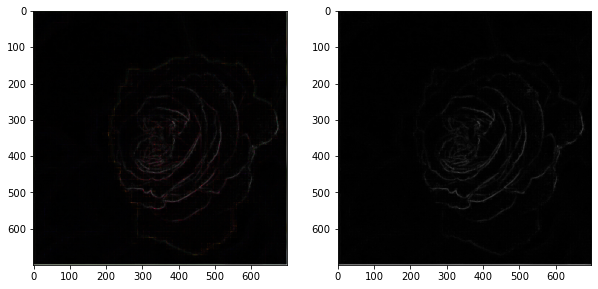

In [96]:
laplace_mask = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
laplace_k1 = 1
laplace_mask = laplace_mask*laplace_k1

laplace_img = apply_mask(img, laplace_mask)
laplace_gc_img = apply_mask(gc_img, laplace_mask)

fig,axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(laplace_img)
axs[1].imshow(laplace_gc_img)

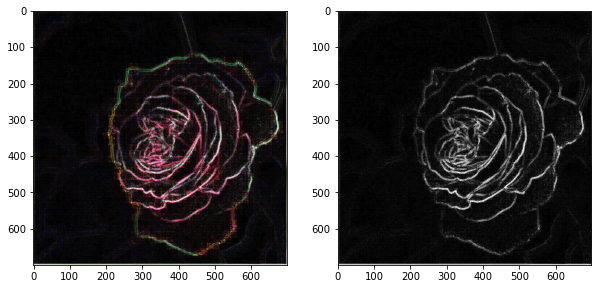

In [97]:
laplace_mask = np.array([[0, -1,-1,-1, 0],\
                         [-1, 3,-4, 3,-1],\
                         [-1,-4,16,-4,-1],\
                         [-1, 3,-4, 3,-1],\
                         [0, -1,-1,-1, 0]])
laplace_k1 = 1
laplace_mask = laplace_mask*laplace_k1

laplace_img_2 = apply_mask(img, laplace_mask)
laplace_gc_img_2 = apply_mask(gc_img, laplace_mask)

fig,axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(laplace_img_2)
axs[1].imshow(laplace_gc_img_2)

# Save image

In [105]:
folder_name = 'image/size_3/'
plt.imsave(folder_name + '1_low_pass_img.jpg', low_pass_img)
plt.imsave(folder_name + '2_high_pass_img.jpg', high_pass_img)
plt.imsave(folder_name + '3_prewitt_vertical_img.jpg', prewitt_vertical_img)
plt.imsave(folder_name + '4_prewitt_horizontal_img.jpg', prewitt_horizontal_img)
plt.imsave(folder_name + '5_sobel_vertical_img.jpg', sobel_vertical_img)
plt.imsave(folder_name + '6_sobel_horizontal_img.jpg', sobel_horizontal_img)
plt.imsave(folder_name + '7_laplace_img.jpg', laplace_img)

In [106]:
folder_name = 'image/size_5/'
plt.imsave(folder_name + '1_low_pass_img.jpg', low_pass_img_2)
plt.imsave(folder_name + '2_high_pass_img.jpg', high_pass_img_2)
plt.imsave(folder_name + '3_prewitt_vertical_img.jpg', prewitt_vertical_img_2)
plt.imsave(folder_name + '4_prewitt_horizontal_img.jpg', prewitt_horizontal_img_2)
plt.imsave(folder_name + '5_sobel_vertical_img.jpg', sobel_vertical_img_2)
plt.imsave(folder_name + '6_sobel_horizontal_img.jpg', sobel_horizontal_img_2)
plt.imsave(folder_name + '7_laplace_img.jpg', laplace_img_2)

In [107]:
folder_name = 'image/grayscale/'
plt.imsave(folder_name + '1_low_pass_img.jpg', low_pass_gc_img)
plt.imsave(folder_name + '2_high_pass_img.jpg', high_pass_gc_img)
plt.imsave(folder_name + '3_prewitt_vertical_img.jpg', prewitt_vertical_gc_img)
plt.imsave(folder_name + '4_prewitt_horizontal_img.jpg', prewitt_horizontal_gc_img)
plt.imsave(folder_name + '5_sobel_vertical_img.jpg', sobel_vertical_gc_img)
plt.imsave(folder_name + '6_sobel_horizontal_img.jpg', sobel_horizontal_gc_img)
plt.imsave(folder_name + '7_laplace_img.jpg', laplace_gc_img)